# Group 6
# Apurv(291049)
# Arshpreet Singh Bagga(291013)
# Anuj Sharma(291070)
# Jumbish S Dang(291032)
# Bikramaditya Guho(291017)

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

# Loading data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [4]:
print(train.shape)
train.head()

(60000, 785)


label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      0       0       0       0  ...         0         0         0         0
1      1       0       0       0  ...         0         0         0         0
2      2       0       0       0  ...         0         0         0         0
3      3       0       0       0  ...         0         0         0         0
4      4       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [6]:
from google.colab import files
uploaded2 = files.upload()

Saving test.csv to test.csv


In [7]:
test = pd.read_csv(io.BytesIO(uploaded2['test.csv']))
print(test.shape)
test.head()

(5000, 785)


id  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0   0       0       0       0  ...         0         0         0         0
1   1       0       0       0  ...         0         0         0         0
2   2       0       0       0  ...         0         0         0         0
3   3       0       0       0  ...         0         0         0         0
4   4       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [8]:
X_train = (train.iloc[:,1:].values).astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
X_test = (test.iloc[:,1:].values).astype('float32')

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_train

array([0, 1, 2, ..., 7, 8, 9], dtype=int32)

In [11]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Data Visulaization

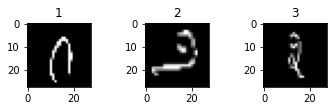

In [12]:
X_train = X_train.reshape(X_train.shape[0],28,28)

for i in range(1,4):
    plt.subplot(329+(i+1))
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [13]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) 
X_test = X_test.reshape(X_test.shape[0],28,28,1) 
print(X_train.shape) 
print(X_test.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)


# Preprocessing data images

# Feature Standardization

In [14]:
meanpx = X_train.mean().astype(np.float32)
stdpx = X_train.std().astype(np.float32)

def standardize(x):
    return (x-meanpx)/stdpx

# One-hot encoding of labels

In [15]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


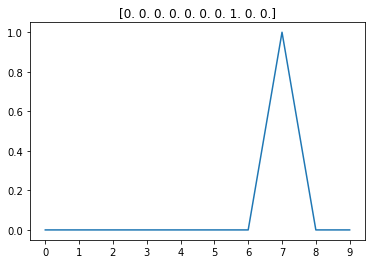

In [16]:
plt.title(y_train[7])
plt.plot(y_train[7])
plt.xticks(range(10));

# Designing Neural Net Architecture

# Linear Model

In [17]:
from keras.models import Sequential 
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [18]:
model = Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [19]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [20]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

# Fully Connected Layer

In [21]:
def fully_connected_layer():
    model=Sequential([
        Lambda(standardize,input_shape=(28,28,1)),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(10,activation='softmax')
    ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
fc = fully_connected_layer()
fc.optimizer.lr=0.01

# Convolution Neural Network

In [23]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Data Augmentation

In [24]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

# Adding Batch Normalization

In [25]:
from keras.layers import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize,input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512,activation='relu'),
        BatchNormalization(),
        Dense(10,activation='softmax')
    ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

**T-SNE**

In [49]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



### Loading the necessary libraries

In [27]:
from time import time

import numpy as np
import pandas as pd


# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Setting the label and the feature columns

In [28]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(60000, 784)
[0 1 2 ... 7 8 9]


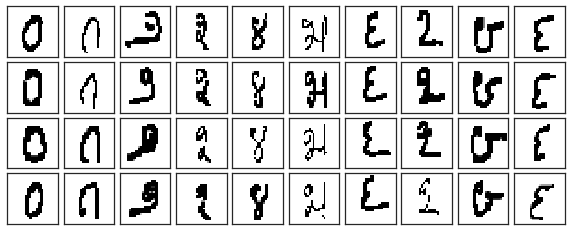

In [29]:
## Plotting the original train data

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [30]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


In [48]:
# Subset of our dataset 

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


### Applyting t-SNE on the data

In [32]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


### Visualizing the t-SNE

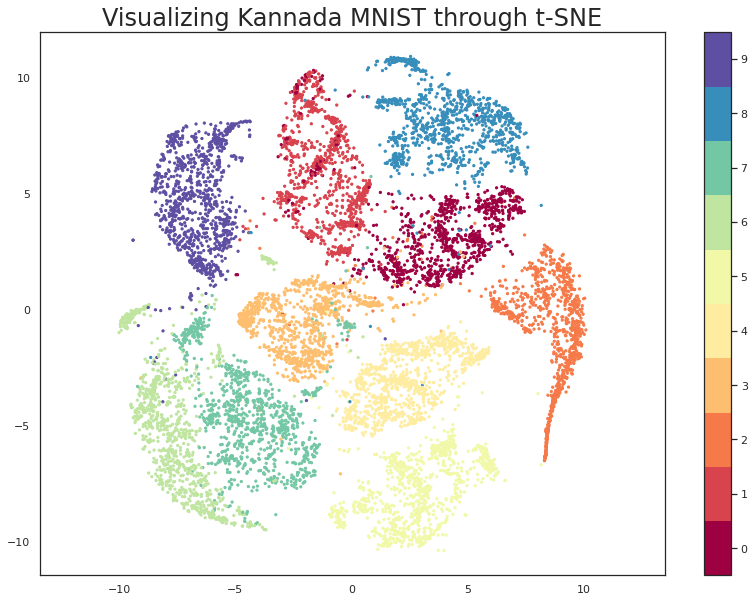

In [33]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

### Using PCA to reduce dimensions of data before feeding to t-SNE  algorithm

In [34]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [35]:
# Using the output of PCA as input for t-SNE
%time
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


The time taken for the algorithm to run has been considerably reduced.

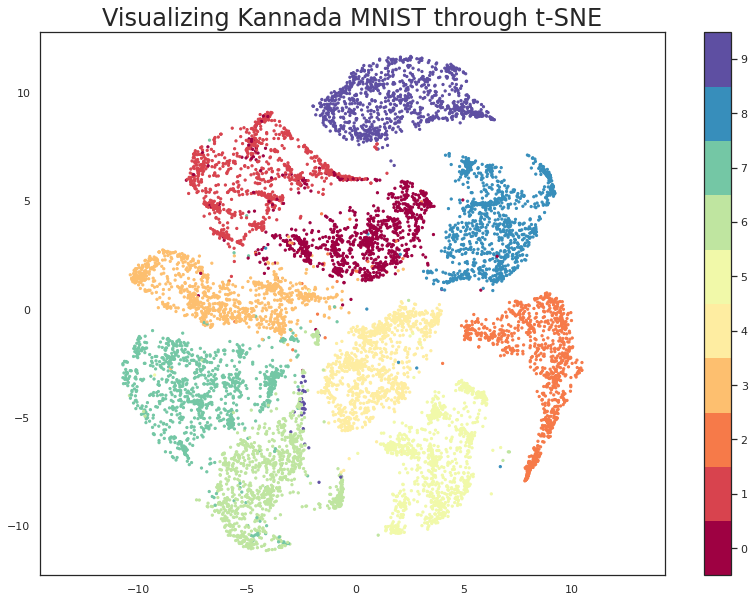

In [36]:
#visualising t-SNE again 

plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

### Visualising TSNE in 3D

Visualising the output as a 3D scatter plot:
## With Matplotlib

In [37]:
%time
pca_tsne2 = TSNE(random_state = 42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


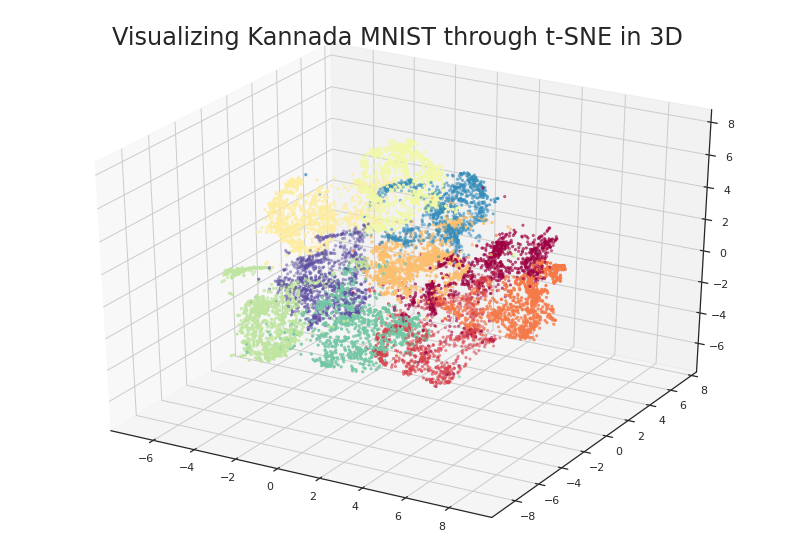

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=y_subset, cmap='Spectral')
plt.title('Visualizing Kannada MNIST through t-SNE in 3D', fontsize=24);
plt.show()

## With Plotly

In [39]:
x=pca_tsne2[:, 0]
y=pca_tsne2[:, 1]
z=pca_tsne2[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=x,                # set color to an array/list of desired values
        colorscale='Spectral',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [40]:
x=pca_tsne2[:, 0]
y=pca_tsne2[:, 1]
z=pca_tsne2[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=3, symbol="circle"),
    )
])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Using Bokeh to visualize t-SNE




In [41]:
# Encoding all the images for inclusion in a dataframe.

from io import BytesIO
from PIL import Image
import base64


def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((28,28), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [42]:
# loading up bokeh and other tools to generate a suitable interactive plot.

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

In [43]:
# Generating the plot itself with a custom hover tooltip 

x_subset_reshape = x_subset.reshape(-1,28,28)

digits_df = pd.DataFrame(pca_tsne, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in y_subset]
digits_df['image'] = list(map(embeddable_image, x_subset_reshape))


datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in y_subset],
                                       palette=Spectral10)

plot_figure = figure(
    title='t-SNE projection of the Kannada MNIST dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

**UMAP**

In [44]:
# Loading necessary libraries

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# For plotting
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Reading in the data

In [45]:
#Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(60000, 784)
[0 1 2 ... 7 8 9]


In [46]:
# Subsetting a data for faster execution

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


## Using Bokeh to visualize UMAP



In [47]:
# Encoding all the images for inclusion in a dataframe.
from io import BytesIO
from PIL import Image
import base64


def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((28,28), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

# loading up bokeh and other tools to generate a suitable interactive plot.

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()